<a href="https://colab.research.google.com/github/tsdes-santiago/projetos_bootcamp_DIO/blob/main/Reconhecimento_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIO: Machine learning

## Criando um Sistema de Reconhecimento Facial

Nesse código utilizamos uma rede para extrair as faces de uma foto e outra para classificar as pessoas comparando com fotos de pessoas conhecidas salvas.

Para a classificação a rede usa a GPU, ative em Edit -> Notebook settings a GPU para o runtime.

## Detecção e extração de faces

Usando a rede mtcnn para detecção e extração das faces de uma imagem seguindo https://www.sitepoint.com/keras-face-detection-recognition/


In [1]:
#Instalando mtcnn
!pip install mtcnn

In [2]:
#importando modulo para plot e mtcnn
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

In [3]:
#Baixando uma imagem da internet
!wget -O oscar_2017.jpg -c "https://s2-g1.glbimg.com/vkA5DW-Cl8jjGM1kH8h70sbAxa4=/0x0:1920x1200/1008x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2017/8/J/HRxzhRTPGJF6ZHZH1m1A/oscar-2017.jpg"

--2024-03-01 14:45:36--  https://s2-g1.glbimg.com/vkA5DW-Cl8jjGM1kH8h70sbAxa4=/0x0:1920x1200/1008x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2017/8/J/HRxzhRTPGJF6ZHZH1m1A/oscar-2017.jpg
Resolving s2-g1.glbimg.com (s2-g1.glbimg.com)... 186.192.91.9
Connecting to s2-g1.glbimg.com (s2-g1.glbimg.com)|186.192.91.9|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [4]:
image = plt.imread('oscar_2017.jpg')

In [5]:
#extraindo as faces
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
  print(face)

5/5 [==============================] - 1s 92ms/step
{'box': [468, 511, 60, 79], 'confidence': 1.0, 'keypoints': {'left_eye': (484, 544), 'right_eye': (513, 541), 'nose': (502, 557), 'mouth_left': (489, 571), 'mouth_right': (515, 569)}}
{'box': [60, 356, 68, 92], 'confidence': 0.9999996423721313, 'keypoints': {'left_eye': (74, 390), 'right_eye': (108, 390), 'nose': (88, 406), 'mouth_left': (74, 421), 'mouth_right': (106, 423)}}
{'box': [473, 191, 77, 102], 'confidence': 0.9999991655349731, 'keypoints': {'left_eye': (494, 237), 'right_eye': (530, 234), 'nose': (514, 257), 'mouth_left': (498, 268), 'mouth_right': (533, 264)}}
{'box': [456, 352, 79, 106], 'confidence': 0.9999988079071045, 'keypoints': {'left_eye': (478, 393), 'right_eye': (516, 396), 'nose': (495, 410), 'mouth_left': (477, 431), 'mouth_right': (512, 433)}}
{'box': [275, 370, 70, 78], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (294, 395), 'right_eye': (328, 396), 'nose': (311, 410), 'mouth_left': (293, 422)

In [6]:
from matplotlib.patches import Rectangle


In [7]:
#Função para plotar as faces com retângulos
def highlight_faces(image_path, faces):
  # display image
  image = plt.imread(image_path)
  plt.imshow(image)

  ax = plt.gca()

  # for each face, draw a rectangle based on coordinates
  for face in faces:
    x, y, width, height = face['box']
    face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
    ax.add_patch(face_border)
  plt.show()

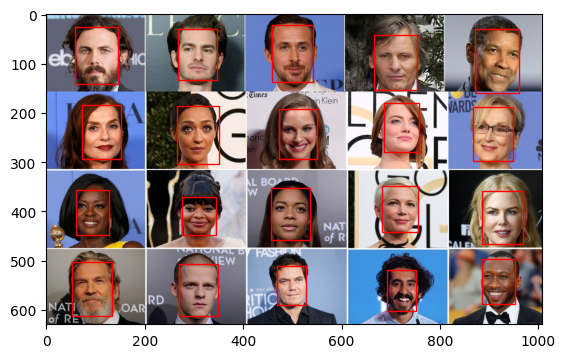

In [8]:
highlight_faces('oscar_2017.jpg', faces)

5/5 [==============================] - 0s 6ms/step


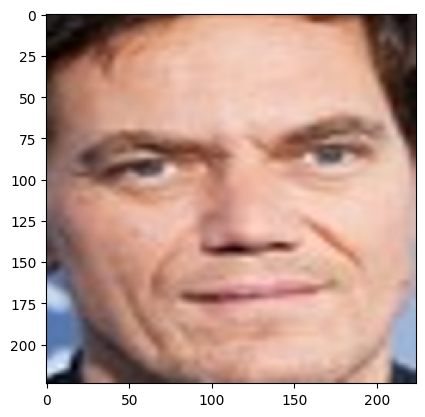

In [9]:
#Extraindo as faces para uma lista
from numpy import asarray
from PIL import Image

def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
  image = plt.imread(image_path)
  detector = MTCNN()
  faces = detector.detect_faces(image)

  face_images = []

  for face in faces:
    # extract the bounding box from the requested face
    x1, y1, width, height = face['box']
    x2, y2 = x1 + width, y1 + height

    # extract the face
    face_boundary = image[y1:y2, x1:x2]

    # resize pixels to the model size
    face_image = Image.fromarray(face_boundary)
    face_image = face_image.resize(required_size)
    face_array = asarray(face_image)
    face_images.append(face_array)

  return face_images

extracted_face = extract_face_from_image('oscar_2017.jpg')

# Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

## Classificação dos atores

No tutorial anterior ele utiliza o keras VGGFace2 Model para classificação da imagem. Esse pacote requer uma versão do tensorflow 1.x, o colab retirou suporte para essa versão e usa a versão 2.x

Vou utilziar o pacote descrito em https://github.com/ageitgey/face_recognition para fazer a classificação. Ele também possui ferramenta para extrair os rostos, porém vou utilizar somente a de classificação.

In [10]:
#instalando o pacote para reconhecimento facial
!pip install face_recognition

O reconhecimento facial é feito por comparação com imagens de pessoas conhecidas. Vou criar uma pasta adicionando uma imagem da Natalie Portman e outra do Denzel Washington

In [11]:
#criando diretório com pessoas conhecidas
!mkdir known

mkdir: cannot create directory ‘known’: File exists


In [12]:
#Baixando imagem da Natalie Portman
!wget -O Natalie_Portman.jpg -c https://upload.wikimedia.org/wikipedia/commons/2/2f/Natalie_Portman_Cannes_2015_5.jpg

--2024-03-01 14:45:57--  https://upload.wikimedia.org/wikipedia/commons/2/2f/Natalie_Portman_Cannes_2015_5.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54842 (54K) [image/jpeg]
Saving to: ‘Natalie_Portman.jpg’

Natalie_Portman.jpg 100%[===================>]  53.56K  --.-KB/s    in 0.03s   

2024-03-01 14:45:57 (1.93 MB/s) - ‘Natalie_Portman.jpg’ saved [54842/54842]



In [13]:
#Baixando imagem do Denzel Washington
!wget -O Denzel_Washington.jpg -c https://upload.wikimedia.org/wikipedia/commons/4/40/Denzel_Washington_2018.jpg

--2024-03-01 14:45:57--  https://upload.wikimedia.org/wikipedia/commons/4/40/Denzel_Washington_2018.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152803 (149K) [image/jpeg]
Saving to: ‘Denzel_Washington.jpg’

Denzel_Washington.j 100%[===================>] 149.22K  --.-KB/s    in 0.05s   

2024-03-01 14:45:57 (3.04 MB/s) - ‘Denzel_Washington.jpg’ saved [152803/152803]



In [14]:
#Movendo as imagens para a pasta de pessoas conhecidas
!mv Natalie_Portman.jpg known/
!mv Denzel_Washington.jpg known/

In [15]:
#Testando o reconhecimento com a foto do oscar 2017
!face_recognition ./known/ ./oscar_2017.jpg

./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,Natalie_Portman
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,unknown_person
./oscar_2017.jpg,Denzel_Washington
./oscar_2017.jpg,unknown_person


Agora vamos criar uma pasta para salvar as faces extraídas e identificar qual nome pertence a qual face

In [16]:
!mkdir unknown

mkdir: cannot create directory ‘unknown’: File exists


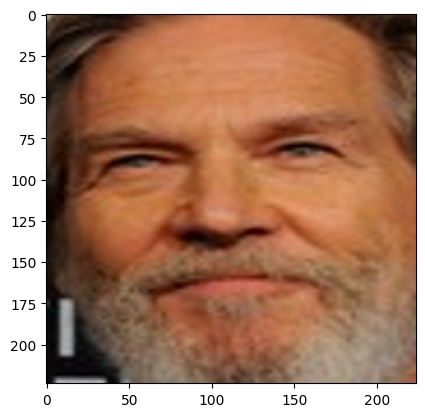

In [17]:
#Salvando as faces extraídas
for i in range(len(extracted_face)):
  plt.imshow(extracted_face[i])
  plt.savefig(f'unknown/face_{i}.jpg')

In [18]:
#Identificando a pessoa
!face_recognition ./known/ ./unknown/

./unknown/face_0.jpg,unknown_person
./unknown/face_6.jpg,unknown_person
./unknown/face_13.jpg,unknown_person
./unknown/face_5.jpg,unknown_person
./unknown/face_12.jpg,unknown_person
./unknown/face_16.jpg,unknown_person
./unknown/face_14.jpg,no_persons_found
./unknown/face_3.jpg,unknown_person
./unknown/face_17.jpg,unknown_person
./unknown/face_4.jpg,no_persons_found
./unknown/face_7.jpg,unknown_person
./unknown/face_9.jpg,unknown_person
./unknown/face_10.jpg,unknown_person
./unknown/face_2.jpg,Natalie_Portman
./unknown/face_8.jpg,unknown_person
./unknown/face_19.jpg,no_persons_found
./unknown/face_1.jpg,unknown_person
./unknown/face_15.jpg,unknown_person
./unknown/face_11.jpg,Denzel_Washington
./unknown/face_18.jpg,unknown_person


In [19]:
#face_2 é a Natalie Portman e face_11 o Denzel Washington, criando uma lista de nomes
names_list = []
for i in range(len(extracted_face)):
  if i == 2:
    names_list.append('Natalie Portman')
  elif i == 11:
    names_list.append('Denzel Washington')
  else:
    names_list.append('unknown')

In [20]:
# Modifico a função de plotar ara adicionar os nomes
def highlight_faces_names(image_path, faces):
  # display image
  image = plt.imread(image_path)
  plt.imshow(image)

  ax = plt.gca()

  # for each face, draw a rectangle based on coordinates
  for i,face in enumerate(faces):
    x, y, width, height = face['box']
    face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
    ax.add_patch(face_border)
    ax.annotate(names_list[i], (x,y), color='green')
  plt.show()

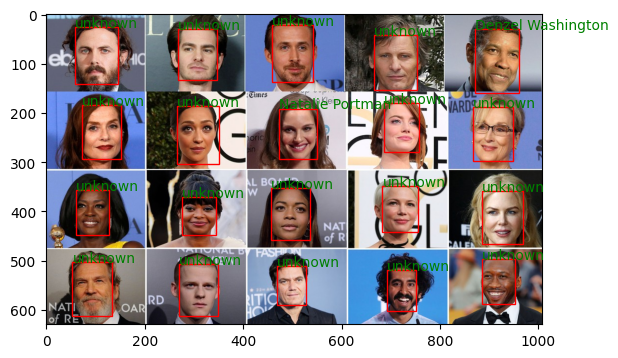

In [21]:
highlight_faces_names('oscar_2017.jpg', faces)